## 准备数据

In [28]:
# 在Jupyter中，使用matplotlib显示图像需要设置为 inline 模式，否则不会显示图像
%matplotlib inline

import matplotlib.pyplot as plt  # 载入matplotlib
import numpy as np  # 载入numpy
import tensorflow as tf  # 载入Tensorflow

np.random.seed(5)


学习的函数为线性函数 𝑦=2𝑥+1

In [29]:
# 直接采用np生成等差数列的方法，生成100个点，每个点的取值在-1~1之间

x_data = np.linspace(-1, 1, 100)

# y = 2x +1 + 噪声， 其中，噪声的维度与x_data一致

y_data = 2 * x_data + 1.0 + np.random.randn(*x_data.shape) * 0.4


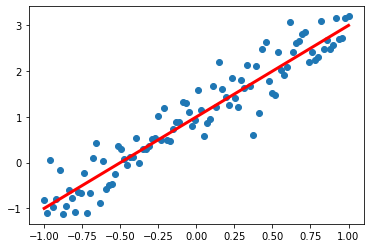

In [30]:
#画出随机生成数据的散点图
plt.scatter(x_data, y_data) 

# 画出我们想要学习到的线性函数 y = 2x +1

plt.plot (x_data, 2 * x_data + 1.0, color = 'red',linewidth=3) 

## 构建模型

In [31]:
# 定义训练数据的占位符，x是特征值，y是标签值

x = tf.placeholder("float", name="x")
y = tf.placeholder("float", name="y")


In [32]:
def model(x, w, b):
    return tf.multiply(x, w) + b


In [33]:
# 构建线性函数的斜率，变量w
w = tf.Variable(1.0, name="w0")

# 构建线性函数的截距，变量b
b = tf.Variable(0.0, name="b0")

# pred是预测值，前向计算
pred = model(x, w, b)


In [34]:
# 迭代次数（训练轮数）
train_epochs = 10

# 学习率
learning_rate = 0.05

# 控制显示loss值的粒度
display_step = 10


In [35]:
# 采用均方差作为损失函数
loss_function = tf.reduce_mean(tf.square(y - pred))

# 梯度下降优化器
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss_function)


In [36]:
sess = tf.Session()

init = tf.global_variables_initializer()

sess.run(init)


## 训练模型

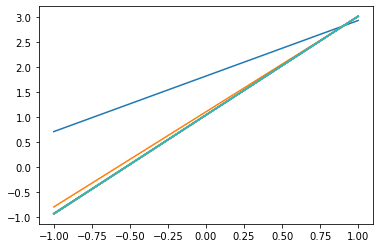

In [37]:
# 开始训练，轮数为 epoch，采用SGD随机梯度下降优化方法
for epoch in range(train_epochs):
    for xs, ys in zip(x_data, y_data):
        _, loss = sess.run([optimizer, loss_function], feed_dict={x: xs, y: ys})

    b0temp = b.eval(session=sess)
    w0temp = w.eval(session=sess)
    plt.plot(x_data, w0temp * x_data + b0temp)  # 画图


## 进行预测

In [38]:
x_test = 3.21

predict = sess.run(pred, feed_dict={x: x_test})
print("预测值：%f" % predict)

target = 2 * x_test + 1.0
print("目标值：%f" % target)


预测值：7.405184
目标值：7.420000


## 在训练中显示损失值

Train Epoch: 01 Step: 010 loss= 0.036219940
Train Epoch: 01 Step: 020 loss= 0.084148541
Train Epoch: 01 Step: 030 loss= 0.000472929
Train Epoch: 01 Step: 040 loss= 0.326461911
Train Epoch: 01 Step: 050 loss= 0.027518081
Train Epoch: 01 Step: 060 loss= 0.010233042
Train Epoch: 01 Step: 070 loss= 0.127347127
Train Epoch: 01 Step: 080 loss= 0.001027349
Train Epoch: 01 Step: 090 loss= 0.102888055
Train Epoch: 01 Step: 100 loss= 0.048337195
Train Epoch: 02 Step: 110 loss= 0.036219940
Train Epoch: 02 Step: 120 loss= 0.084148541
Train Epoch: 02 Step: 130 loss= 0.000472929
Train Epoch: 02 Step: 140 loss= 0.326461911
Train Epoch: 02 Step: 150 loss= 0.027518081
Train Epoch: 02 Step: 160 loss= 0.010233042
Train Epoch: 02 Step: 170 loss= 0.127347127
Train Epoch: 02 Step: 180 loss= 0.001027349
Train Epoch: 02 Step: 190 loss= 0.102888055
Train Epoch: 02 Step: 200 loss= 0.048337195
Train Epoch: 03 Step: 210 loss= 0.036219940
Train Epoch: 03 Step: 220 loss= 0.084148541
Train Epoch: 03 Step: 230 loss= 

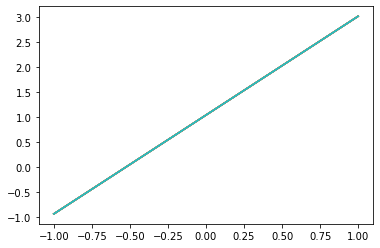

In [39]:
# 开始训练，轮数为 epoch，采用SGD随机梯度下降优化方法
step = 0  # 记录训练步数
loss_list = []  # 用于保存loss值的列表

for epoch in range(train_epochs):
    for xs, ys in zip(x_data, y_data):
        _, loss = sess.run([optimizer, loss_function], feed_dict={x: xs, y: ys})

        # 显示损失值 loss
        # display_step：控制报告的粒度
        # 例如，如果 display_step 设为 2 ，则将每训练2个样本输出一次损失值
        # 与超参数不同，修改 display_step 不会更改模型所学习的规律
        loss_list.append(loss)
        step = step + 1
        if step % display_step == 0:
            print(
                "Train Epoch:",
                "%02d" % (epoch + 1),
                "Step: %03d" % (step),
                "loss=",
                "{:.9f}".format(loss),
            )

    b0temp = b.eval(session=sess)
    w0temp = w.eval(session=sess)
    plt.plot(x_data, w0temp * x_data + b0temp)  # 画图


In [40]:
# logdir改为自己机器上的合适路径
logdir = "./logs/"

# 生成一个写日志的writer,并将当前的TensorFlow计算图写入日志。
writer = tf.summary.FileWriter(logdir, tf.get_default_graph())
writer.close()
